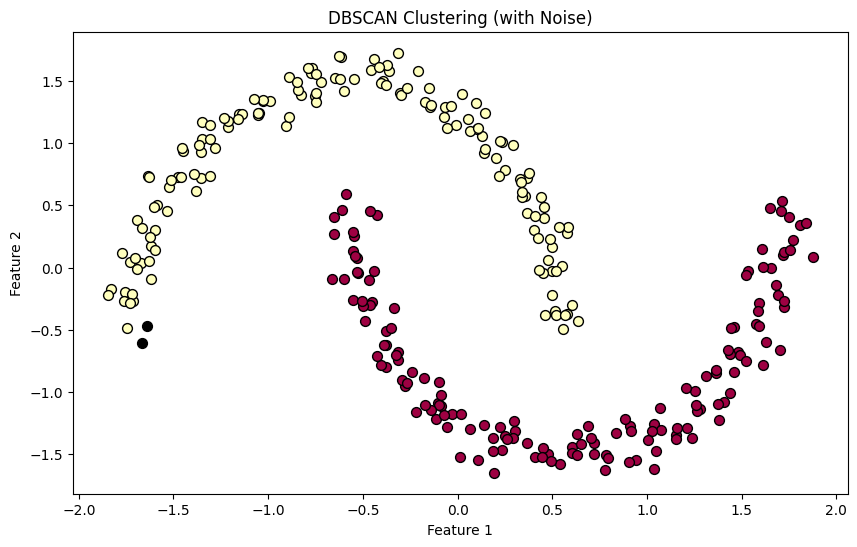

Number of clusters found (excluding noise): 2
Noise points: 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


X, y = make_moons(n_samples=300, noise=0.05, random_state=42)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


dbscan = DBSCAN(eps=0.2, min_samples=5)  
dbscan.fit(X_scaled)


labels = dbscan.labels_


unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:  
        col = [0, 0, 0, 1]  

    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolor='k', s=50)

plt.title("DBSCAN Clustering (with Noise)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


print("Number of clusters found (excluding noise):", len(set(labels)) - (1 if -1 in labels else 0))
print("Noise points:", sum(labels == -1))
